Predicting Customer Churn in Telecom

In [57]:
# Step 1 – Load the dataset and libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib

In [58]:
# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Show basic info and first few rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [59]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [60]:
# Step 2 – Explore the dataset

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [61]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

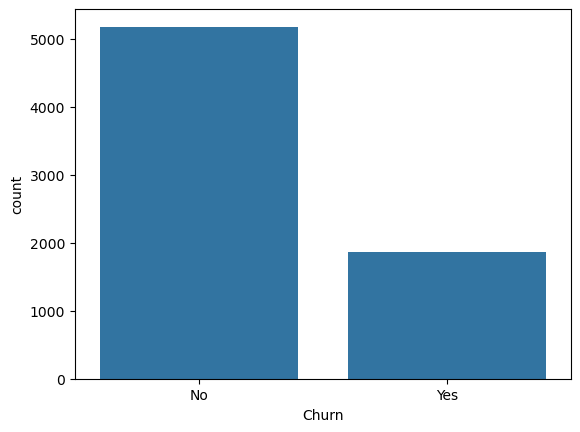

In [62]:
sns.countplot(x='Churn', data=df)
plt.show()

In [63]:
# Step 3 – Handle missing values and data types

# Check if TotalCharges has missing or problematic entries:

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum() 
df.dropna(inplace=True)

In [64]:
# Step 4 – Encode categorical variables
# Use LabelEncoder for binary columns:

le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])  # Yes/No → 1/0

In [78]:
print(df.filter(like='Contract').head())
print(df.filter(like='PaymentMethod').head())
print(df.filter(like='InternetService').head())

   Contract_One year  Contract_Two year
0              False              False
1               True              False
2              False              False
3               True              False
4              False              False
   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                            True   
1                                  False                           False   
2                                  False                           False   
3                                  False                           False   
4                                  False                            True   

   PaymentMethod_Mailed check  
0                       False  
1                        True  
2                        True  
3                       False  
4                       False  
   InternetService_Fiber optic  InternetService_No
0                        False               False
1        

In [79]:
print(df.dtypes)

customerID                                object
gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                   float64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service             bool
TechSupport_Yes     

In [80]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

binary_cols = ['gender','SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling','Churn']
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [82]:
# df = pd.get_dummies(df, columns=['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
#                                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
#                     drop_first=True)

In [83]:
# Step 5 – Scale features- It ensures features with larger numeric ranges do not dominate models like Logistic Regression.

scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [84]:
# Step 6 – Split data into training and test sets

X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [86]:
# Step 7 – Train models
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [87]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [89]:
# Step 8 – Evaluate models

print("Logistic Regression Report")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Report
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [90]:
print("Random Forest Report")
print(classification_report(y_test, y_pred_rf))

Random Forest Report
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.64      0.49      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



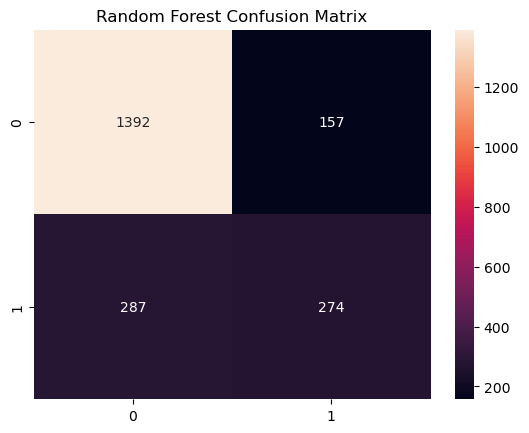

In [91]:
# Plot confusion matrix:

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [93]:
# ROC-AUC Score:
print("ROC AUC:", roc_auc_score(y_test, y_pred_rf))

ROC AUC: 0.6935289169368082


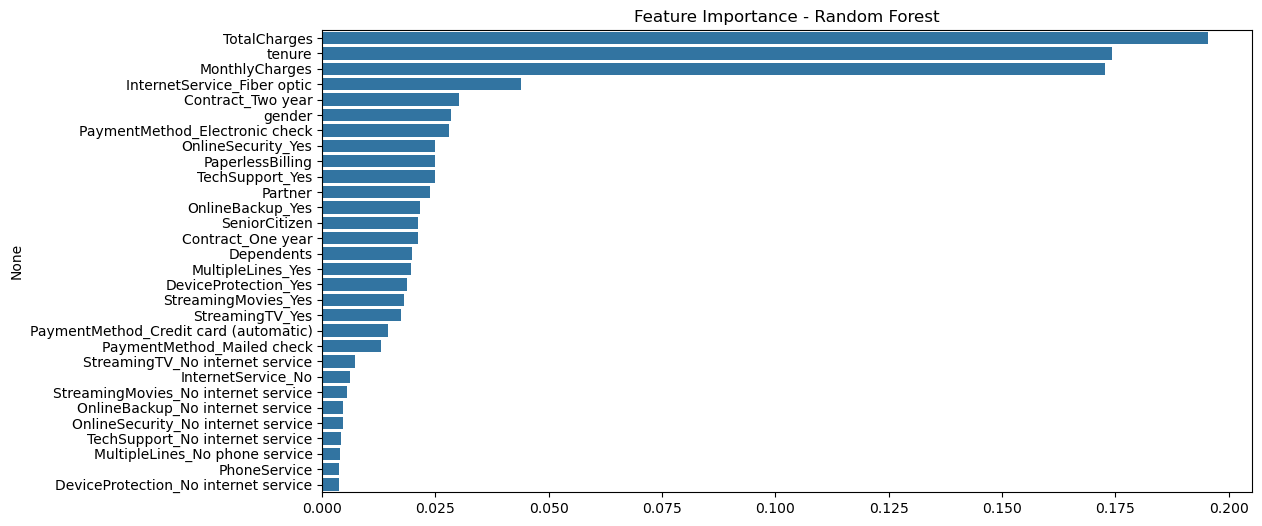

In [94]:
# Step 9 – Feature importance visualization

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importance - Random Forest')
plt.show()

In [98]:
# Step 10 – Save the model for deployment

import joblib
joblib.dump(rf, 'churn_model.pkl')

['churn_model.pkl']

In [101]:
loaded_model = joblib.load('churn_model.pkl')
result = loaded_model.predict(X_test)